
# DATA ANALYTICS 
# Govt Dataset For Inter State Probability Transaction Under ONORC Plan During Jul 2024

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "impds_jul_2024.csv"  
df = pd.read_csv(file_path)

# Load the dataset

In [5]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   homestatecode  361 non-null    int64 
 1   salestatecode  361 non-null    int64 
 2   month          361 non-null    int64 
 3   year           361 non-null    int64 
 4   txn_count      361 non-null    int64 
 5   salestatename  361 non-null    object
 6   homestatename  361 non-null    object
dtypes: int64(5), object(2)
memory usage: 19.9+ KB


None

,homestatecode,salestatecode,month,year,txn_count,salestatename,homestatename
0,5,1,7,2024,11,JAMMU AND KASHMIR,UTTARAKHAND
1,6,1,7,2024,42,JAMMU AND KASHMIR,HARYANA
2,7,1,7,2024,20,JAMMU AND KASHMIR,DELHI
3,8,1,7,2024,6,JAMMU AND KASHMIR,RAJASTHAN
4,9,1,7,2024,3364,JAMMU AND KASHMIR,UTTAR PRADESH


# Display basic info

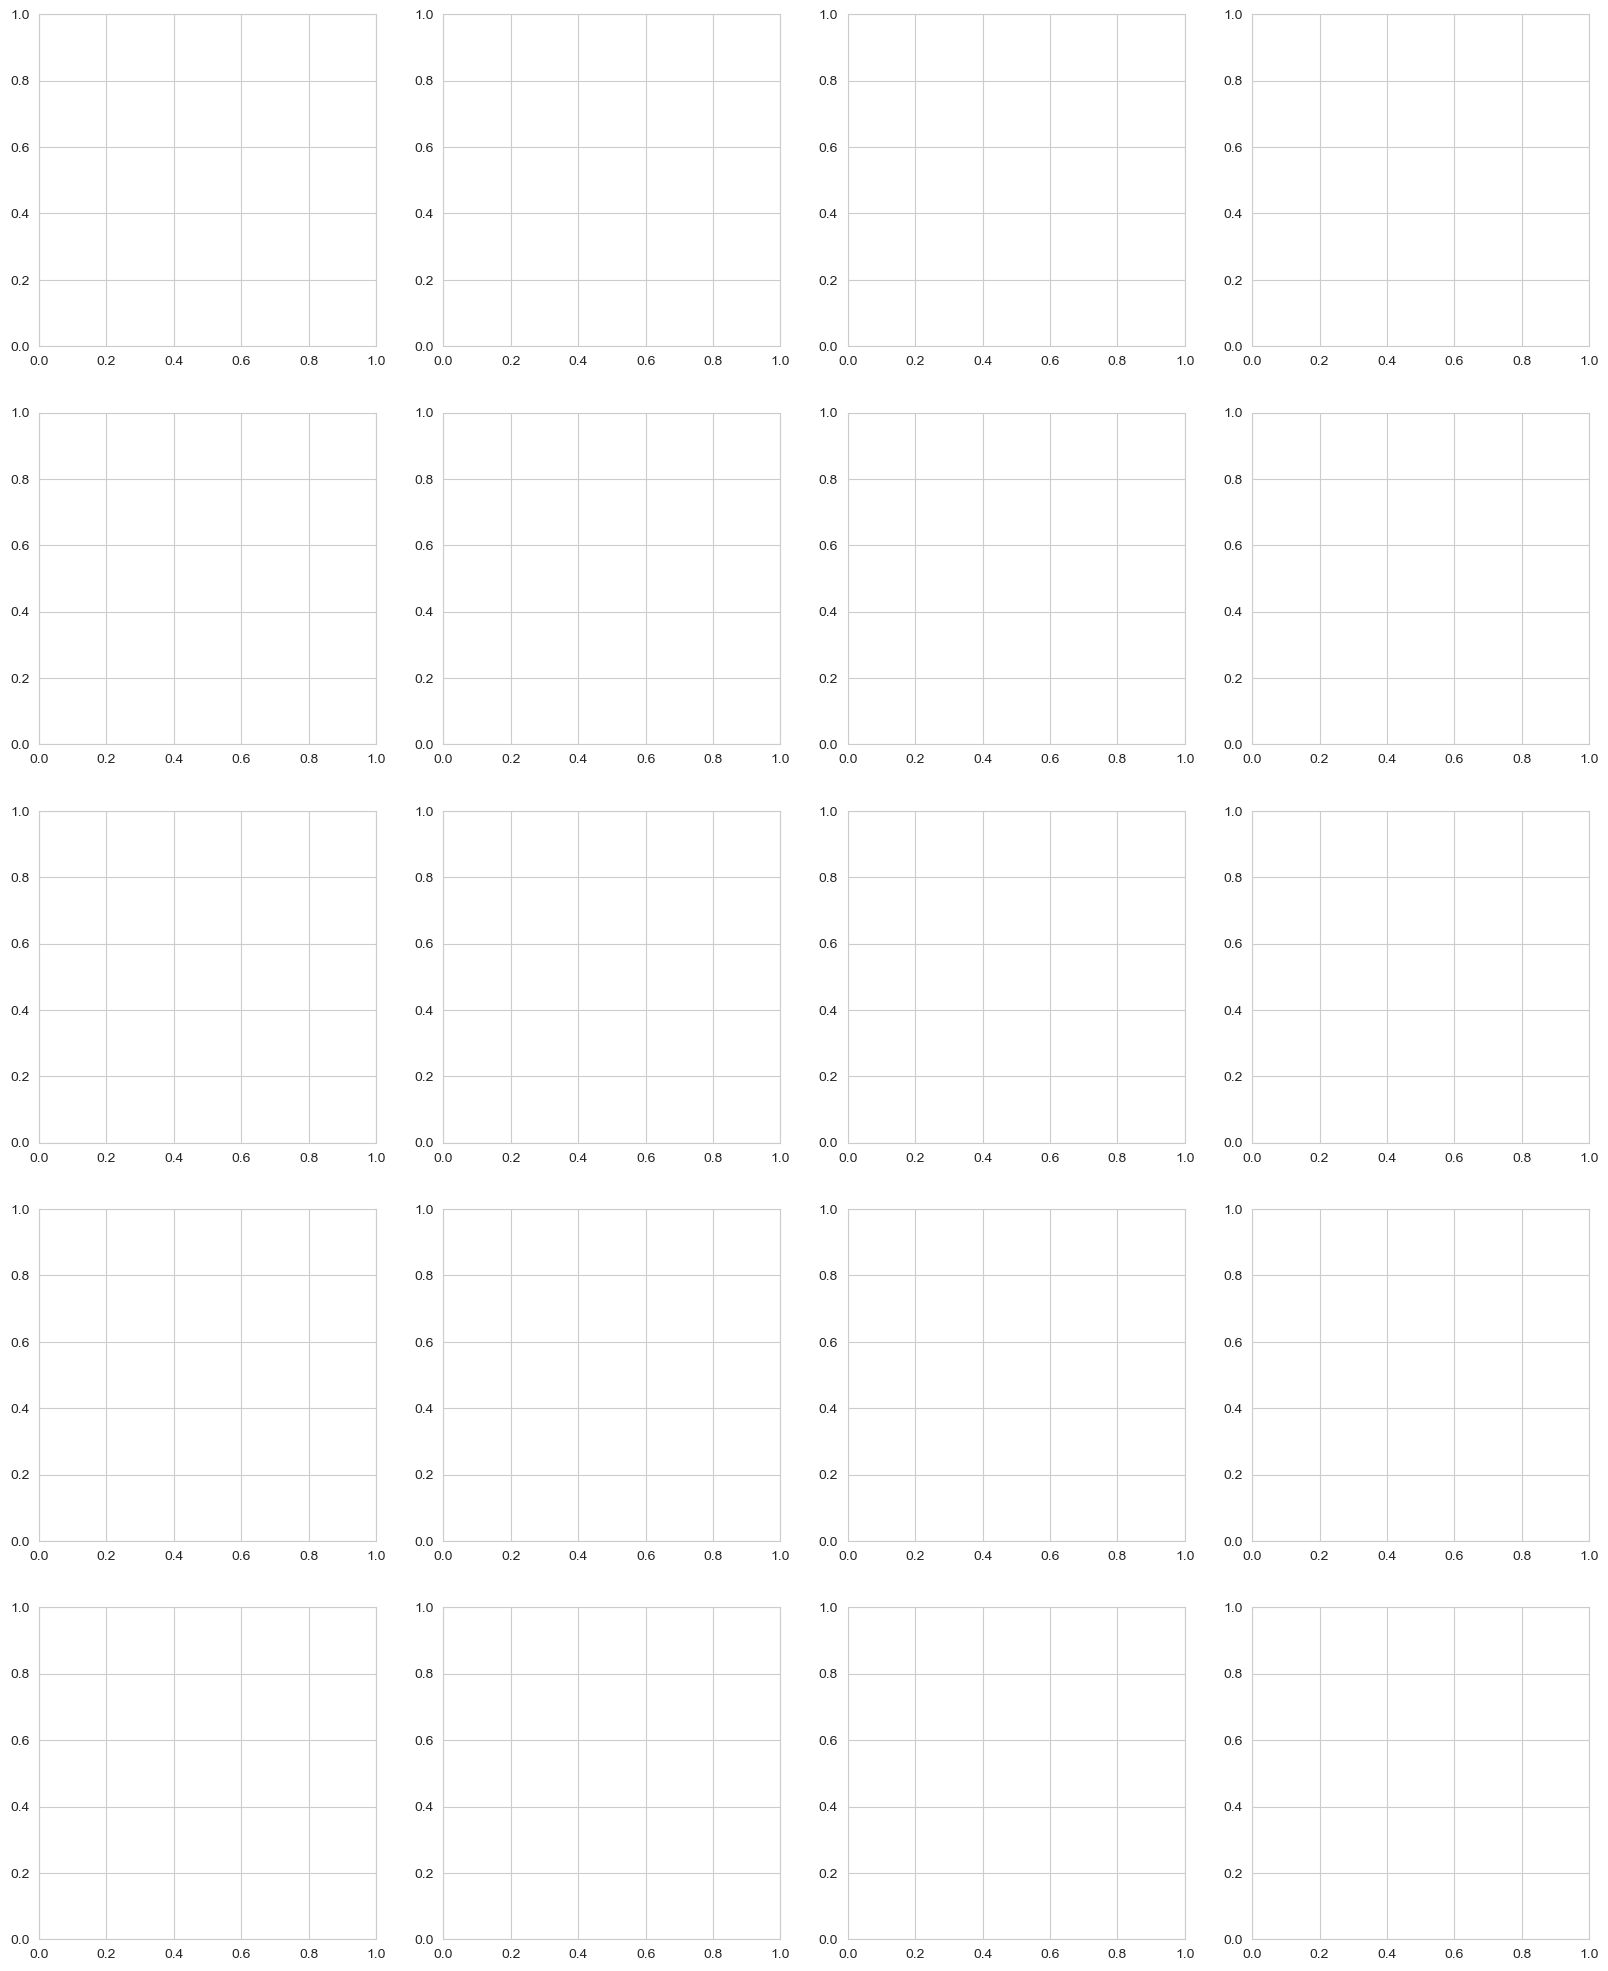

In [7]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()

# visualization style

In [9]:
sns.histplot(df['txn_count'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Transaction Counts")

Text(0.5, 1.0, 'Distribution of Transaction Counts')

# Distribution of transactions

In [11]:
top_states = df.groupby("salestatename")["txn_count"].sum().nlargest(10)
sns.barplot(x=top_states.values, y=top_states.index, ax=axes[1])
axes[1].set_title("Top 10 Sale States by Transaction Count")

Text(0.5, 1.0, 'Top 10 Sale States by Transaction Count')

# Top 10 states with the highest transactions

In [13]:
bottom_states = df.groupby("salestatename")["txn_count"].sum().nsmallest(10)
sns.barplot(x=bottom_states.values, y=bottom_states.index, ax=axes[2])
axes[2].set_title("Bottom 10 Sale States by Transaction Count")

Text(0.5, 1.0, 'Bottom 10 Sale States by Transaction Count')

# Bottom 10 states with the lowest transactions

In [15]:
sns.boxplot(x=df['salestatename'], y=df['txn_count'], ax=axes[3])
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
axes[3].set_title("Transaction Count Distribution by Sale State")

C:\Users\kotar\AppData\Local\Temp\ipykernel_26736\488657582.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Transaction Count Distribution by Sale State')

# Sale state vs transaction count

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=axes[4])
axes[4].set_title("Correlation Heatmap")

Text(0.5, 1.0, 'Correlation Heatmap')

# Correlation heatmap

In [19]:
df["cumulative_txn"] = df["txn_count"].cumsum()
sns.lineplot(x=df.index, y=df["cumulative_txn"], ax=axes[5])
axes[5].set_title("Cumulative Transaction Count Over Time")

Text(0.5, 1.0, 'Cumulative Transaction Count Over Time')

# Cumulative transaction count

In [21]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

# Adjust layout and display plots

In [23]:
Q1 = df["txn_count"].quantile(0.25)
Q3 = df["txn_count"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["txn_count"] < (Q1 - 1.5 * IQR)) | (df["txn_count"] > (Q3 + 1.5 * IQR))]
sns.boxplot(y=df["txn_count"], ax=axes[6])
axes[6].set_title("Outlier Detection in Transaction Counts")

Text(0.5, 1.0, 'Outlier Detection in Transaction Counts')

# Outlier detection using IQR

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import networkx as nx

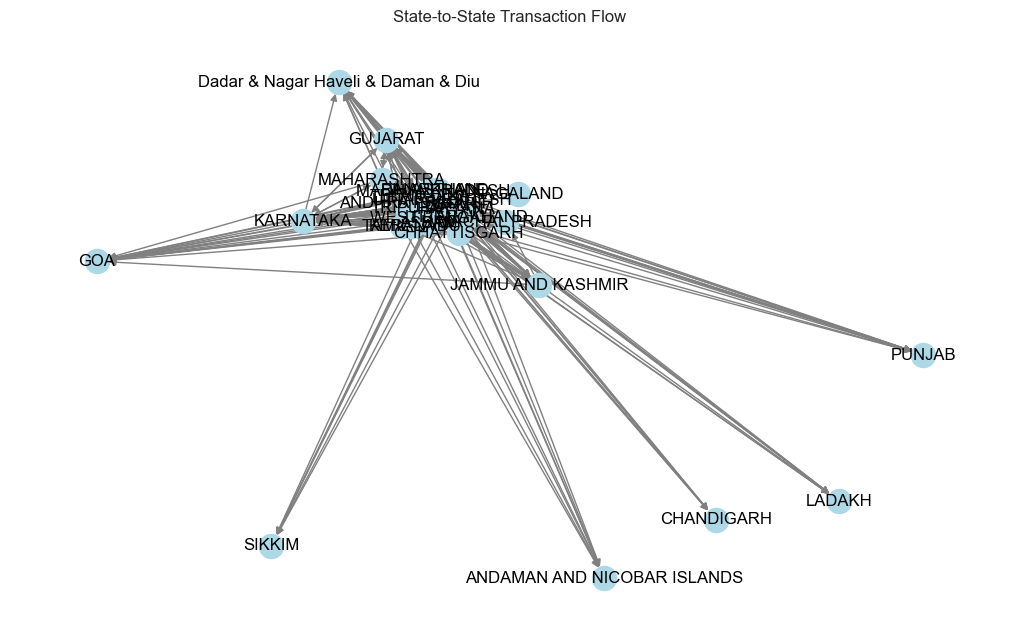

In [26]:
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row["homestatename"], row["salestatename"], weight=row["txn_count"])
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("State-to-State Transaction Flow")
plt.show()

# State-to-State Flow Mapping

In [28]:
X = df[["homestatecode", "salestatecode", "txn_count"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)
sns.scatterplot(x=df["homestatecode"], y=df["salestatecode"], hue=df["cluster"], palette="viridis", ax=axes[7])
axes[7].set_title("Clustering of State Transactions")

C:\Users\kotar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Clustering of State Transactions')

# Clustering Analysis

In [134]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    txn_over_time = df.groupby('date')["txn_count"].sum()
    sns.lineplot(x=txn_over_time.index, y=txn_over_time.values, ax=axes[10])
    axes[10].set_title("Transaction Trends Over Time")
    axes[10].set_xlabel("Date")
    axes[10].set_ylabel("Transaction Count")

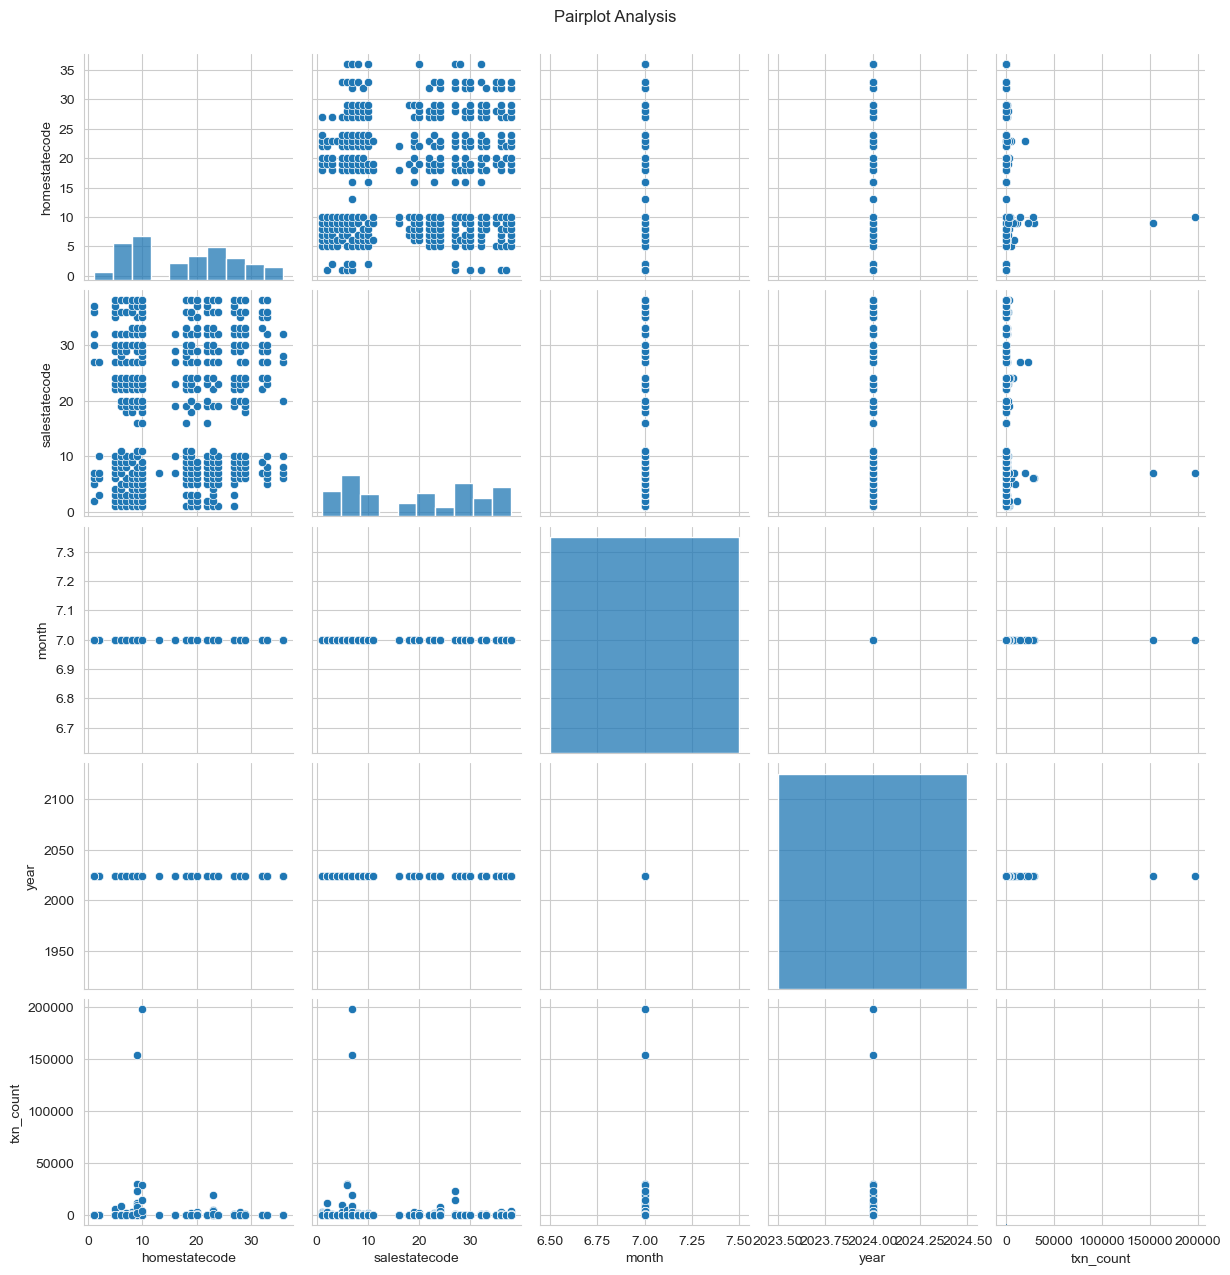

In [81]:
sns.pairplot(df.select_dtypes(include=['number']))
plt.suptitle("Pairplot Analysis", y=1.02)
plt.show()


# Pairplot for numerical features

In [85]:
if 'category_column' in df.columns:
    sns.countplot(y=df['category_column'], ax=axes[11])
    axes[11].set_title("Count of Transactions by Category")

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import networkx as nx

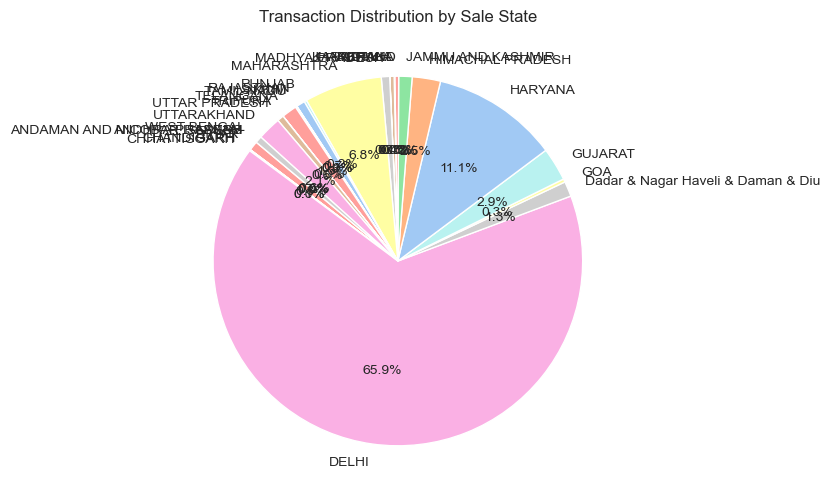

In [89]:
file_path = "impds_jul_2024.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)
txn_by_state = df.groupby("salestatename")["txn_count"].sum()
plt.figure(figsize=(10, 6))
plt.pie(txn_by_state, labels=txn_by_state.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Transaction Distribution by Sale State")
plt.show()

# pie chart for transaction distribution by sale state

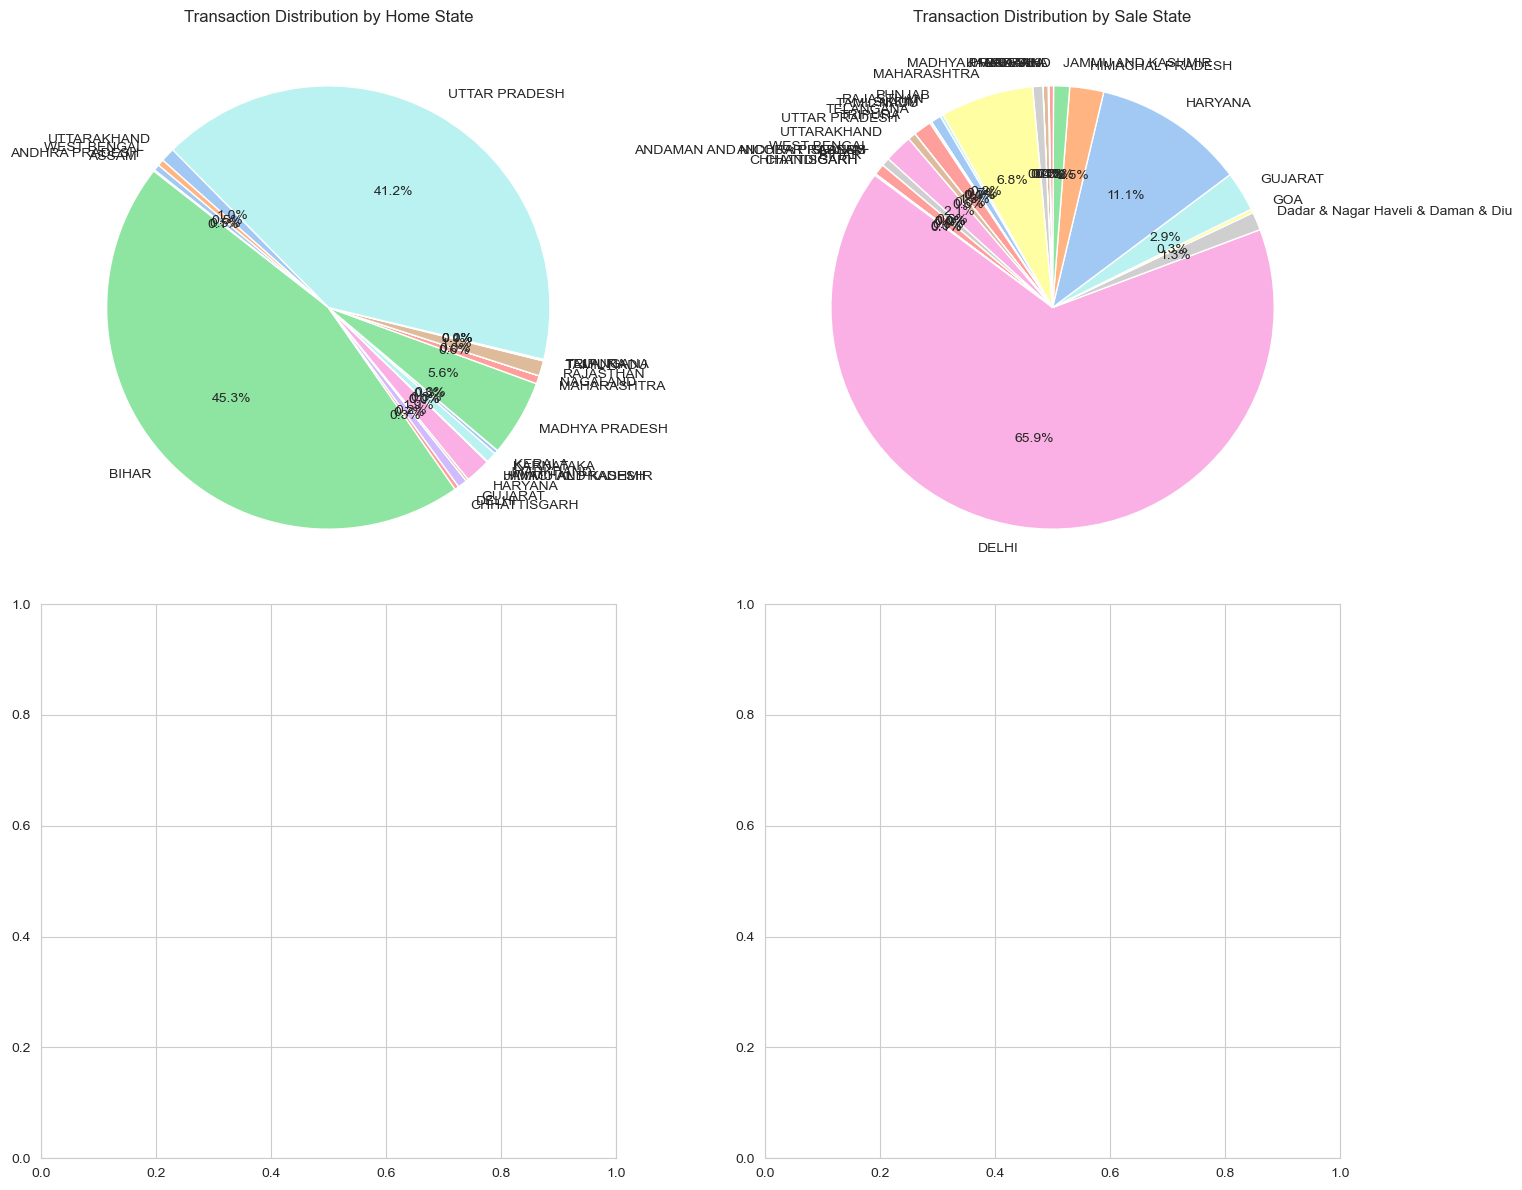

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
txn_by_home_state = df.groupby("homestatename")["txn_count"].sum()
axes[0, 0].pie(txn_by_home_state, labels=txn_by_home_state.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
axes[0, 0].set_title("Transaction Distribution by Home State")
txn_by_sale_state = df.groupby("salestatename")["txn_count"].sum()
axes[0, 1].pie(txn_by_sale_state, labels=txn_by_sale_state.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
axes[0, 1].set_title("Transaction Distribution by Sale State")
if "txn_type" in df.columns:
    txn_type_dist = df["txn_type"].value_counts()
    axes[1, 0].pie(txn_type_dist, labels=txn_type_dist.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    axes[1, 0].set_title("Transaction Type Distribution")
if "product_category" in df.columns:
    product_dist = df["product_category"].value_counts()
    axes[1, 1].pie(product_dist, labels=product_dist.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    axes[1, 1].set_title("Product Category Distribution")
plt.tight_layout()
plt.show()


# Loads the dataset
# Created four pie charts
# Analyzes transactions by home state, sale state, type, and category
# Uses Seaborn's pastel colors for a better visual appeal

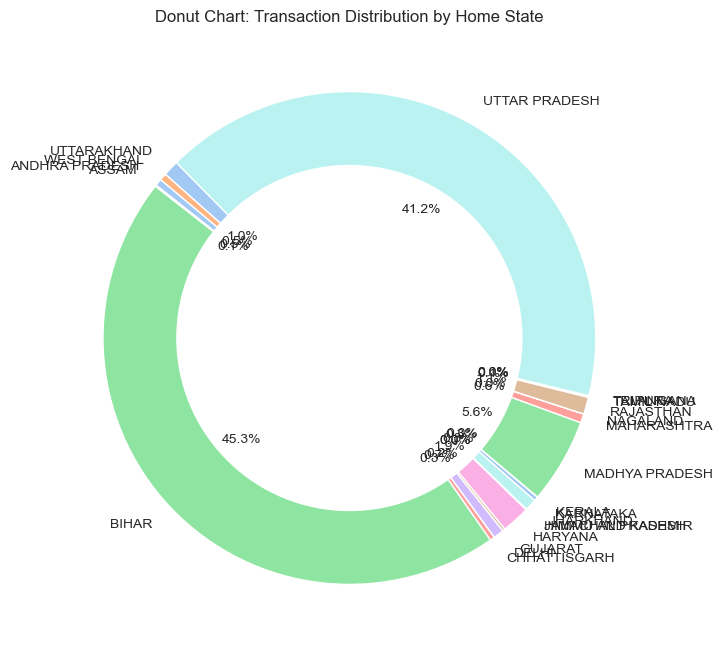

In [94]:
txn_by_home_state = df.groupby("homestatename")["txn_count"].sum()
plt.figure(figsize=(8, 8))
plt.pie(txn_by_home_state, labels=txn_by_home_state.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'white'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Donut Chart: Transaction Distribution by Home State")
plt.show()


# Donut Chart – Transaction Distribution by Home State

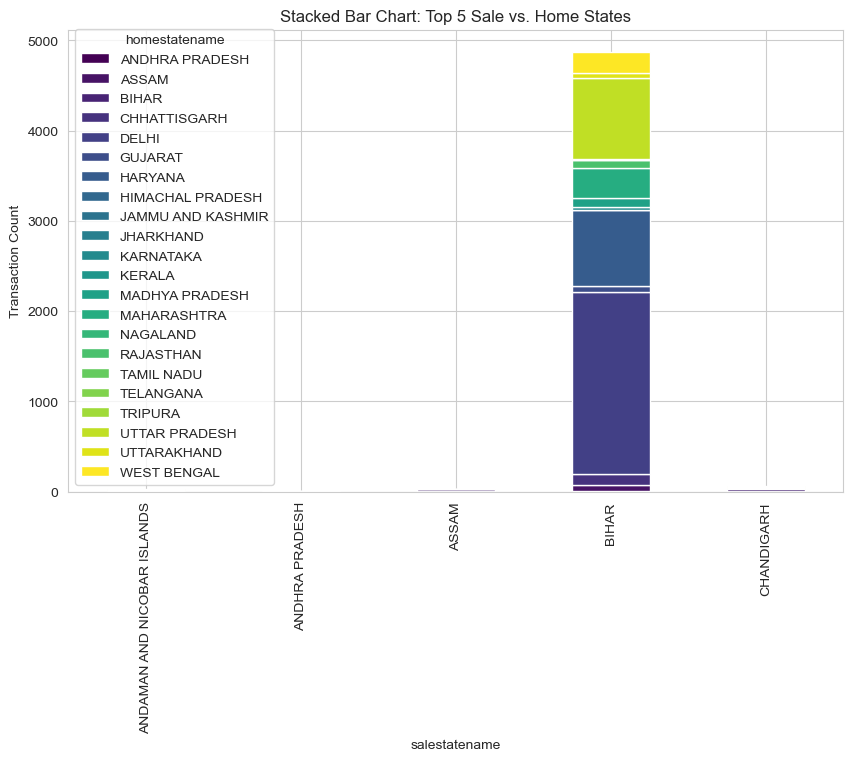

In [118]:
top_5_states = df.groupby(["salestatename", "homestatename"])["txn_count"].sum().unstack().fillna(0).head(5)
top_5_states.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Stacked Bar Chart: Top 5 Sale vs. Home States")
plt.ylabel("Transaction Count")
plt.show()


#  Stacked Bar Chart – Compare Transactions Across States

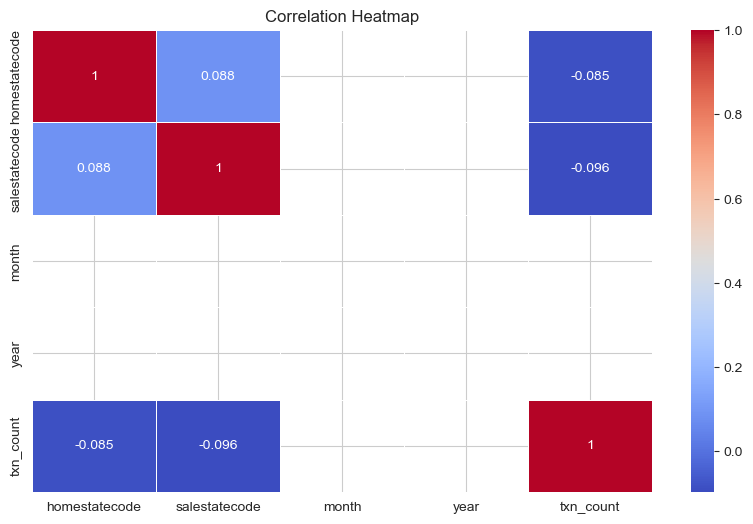

In [98]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Heatmap – Correlation Between Numerical Variables

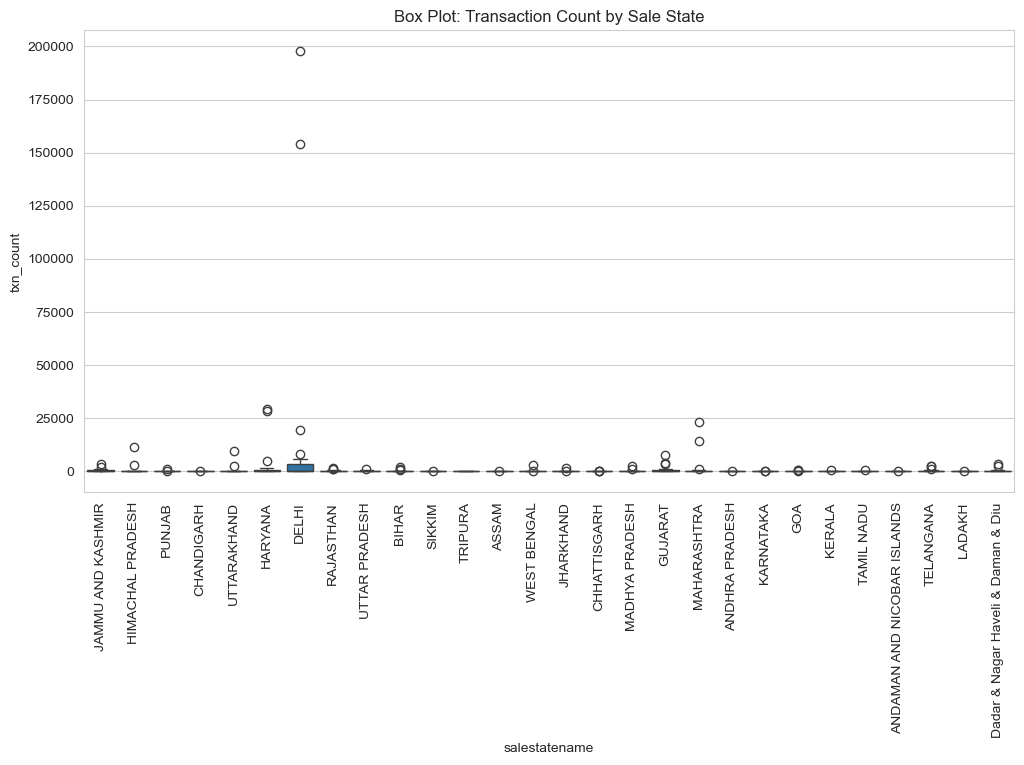

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="salestatename", y="txn_count", data=df)
plt.xticks(rotation=90)
plt.title("Box Plot: Transaction Count by Sale State")
plt.show()


# Box Plot – Transaction Count Distribution by Sale State

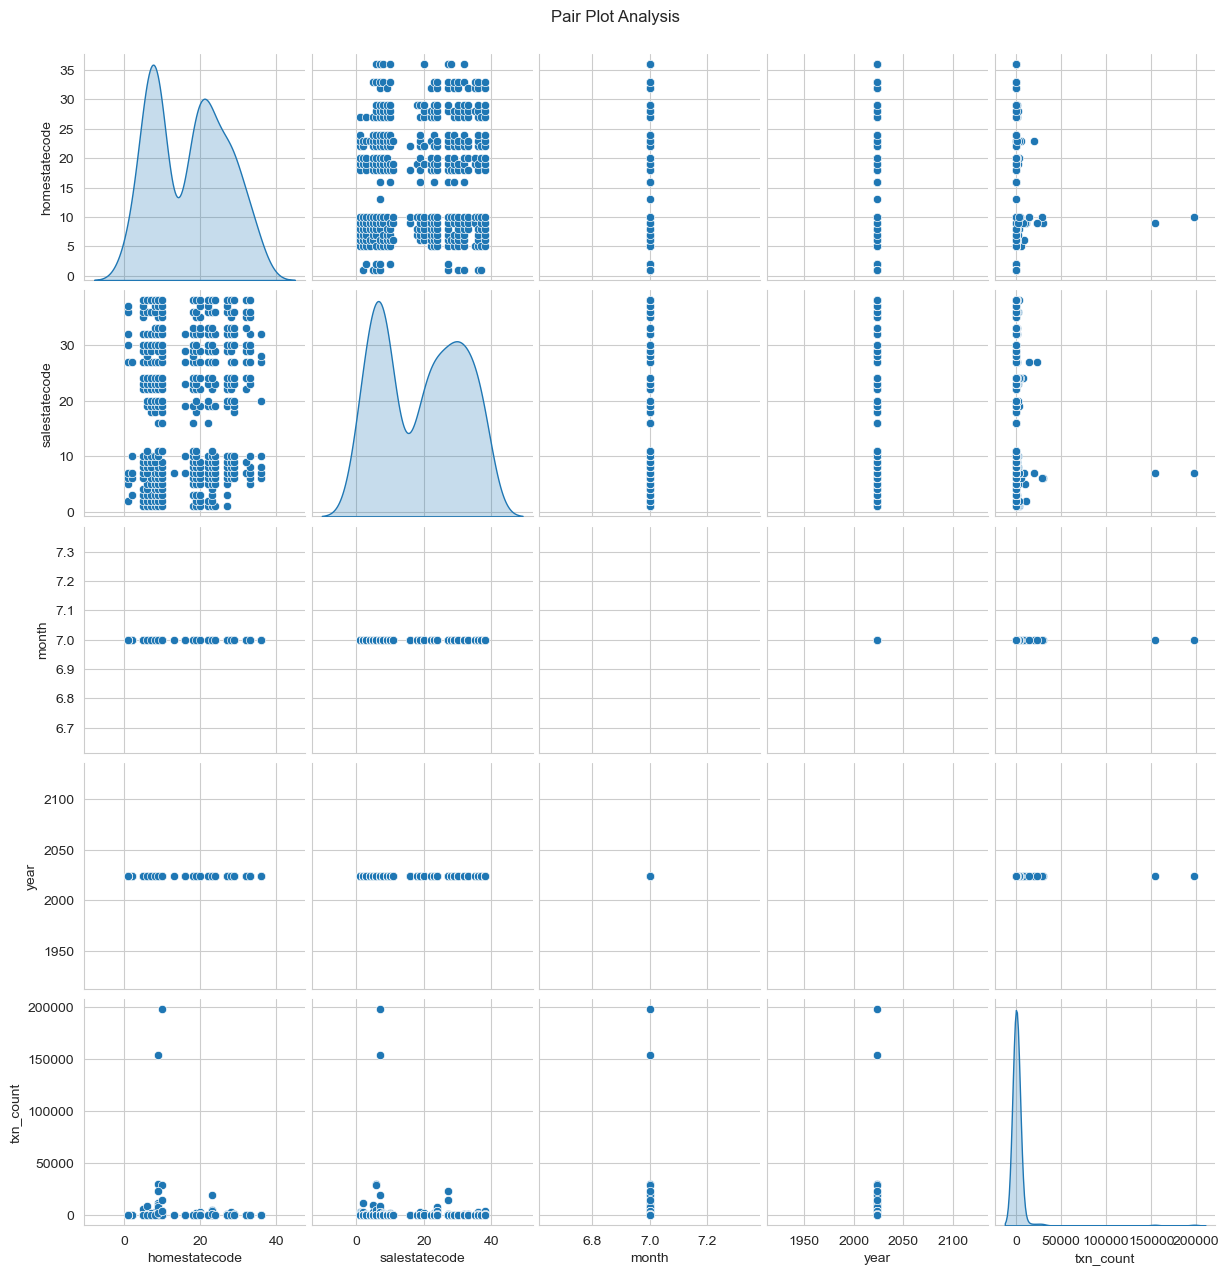

In [102]:
sns.pairplot(df.select_dtypes(include=['number']), diag_kind='kde')
plt.suptitle("Pair Plot Analysis", y=1.02)
plt.show()


# Pair Plot – Relationship Between Numerical Features

C:\Users\kotar\AppData\Local\Temp\ipykernel_26736\3727654226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="salestatename", y="txn_count", data=df, inner="quartile", palette="muted")


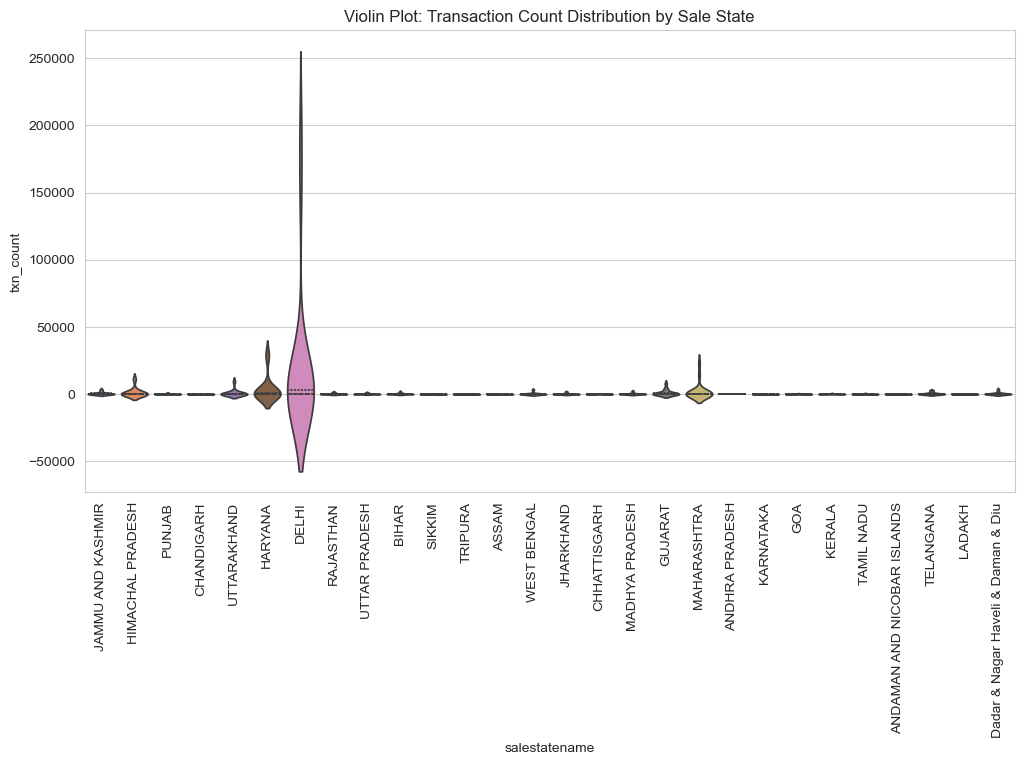

In [104]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="salestatename", y="txn_count", data=df, inner="quartile", palette="muted")
plt.xticks(rotation=90)
plt.title("Violin Plot: Transaction Count Distribution by Sale State")
plt.show()


# Violin Plot – Distribution of Transactions by State

# Horizontal Bar Chart – Top 10 States by Transactions

C:\Users\kotar\AppData\Local\Temp\ipykernel_26736\4243716372.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["txn_count"], shade=True, color="green")


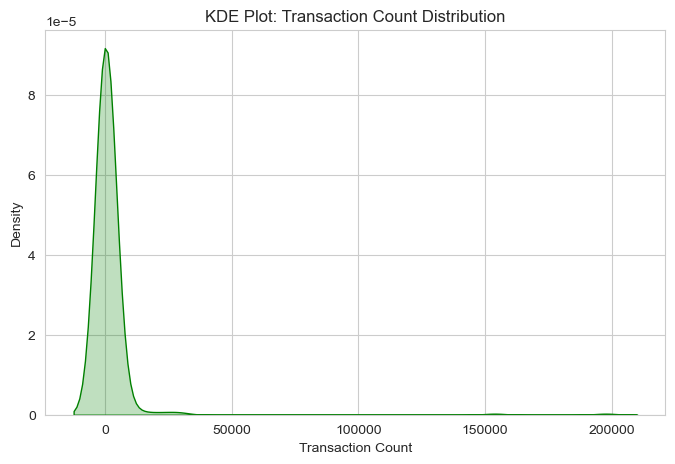

In [108]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df["txn_count"], shade=True, color="green")
plt.title("KDE Plot: Transaction Count Distribution")
plt.xlabel("Transaction Count")
plt.ylabel("Density")
plt.show()


# KDE (Density) Plot – Transaction Count Distribution

In [136]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])  # Drop invalid dates

    txn_over_time = df.groupby('date')["txn_count"].sum()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=txn_over_time.index, y=txn_over_time.values, marker="o", color="red")
    plt.title("Transaction Trends Over Time")
    plt.xlabel("Date")
    plt.ylabel("Transaction Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()


# Line Plot – Transaction Trends Over Time

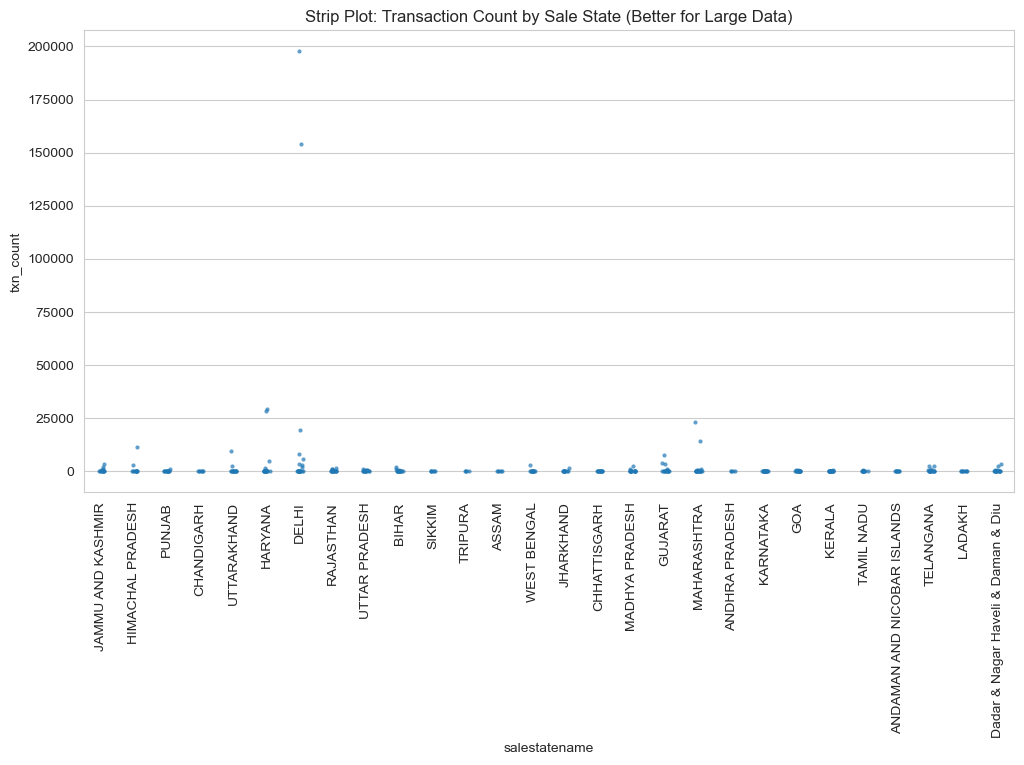

In [112]:
plt.figure(figsize=(12, 6))
sns.stripplot(x="salestatename", y="txn_count", data=df, jitter=True, size=3, alpha=0.7)
plt.xticks(rotation=90)
plt.title("Strip Plot: Transaction Count by Sale State (Better for Large Data)")
plt.show()


# Alternative: Using Strip Plot Instead

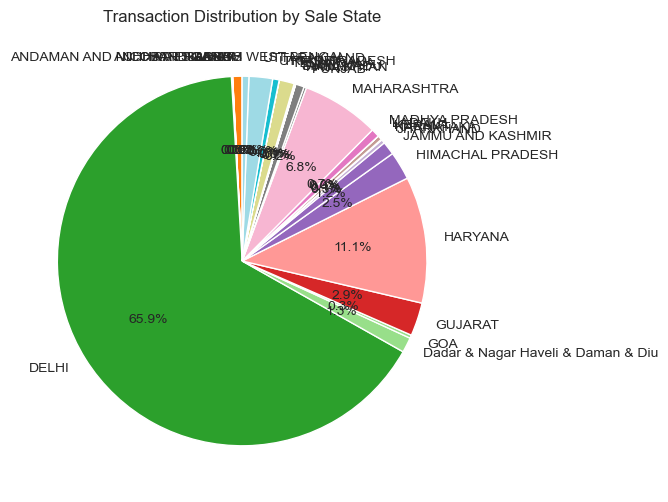

In [138]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby("salestatename")["txn_count"].sum()
df_grouped.plot.pie(autopct="%1.1f%%", startangle=90, cmap="tab20")
plt.title("Transaction Distribution by Sale State")
plt.ylabel("")  # Hide the y-label
plt.show()

# Pie chart for transactions by sale state

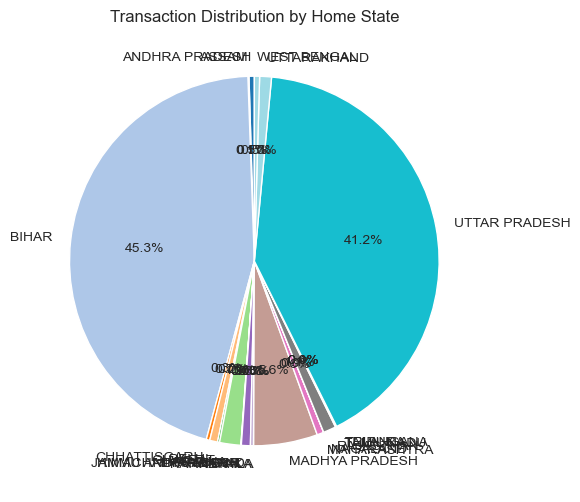

In [141]:
plt.figure(figsize=(10, 6))
df_grouped_home = df.groupby("homestatename")["txn_count"].sum()
df_grouped_home.plot.pie(autopct="%1.1f%%", startangle=90, cmap="tab20")
plt.title("Transaction Distribution by Home State")
plt.ylabel("")  # Hide the y-label
plt.show()

# Pie chart for transactions by home state

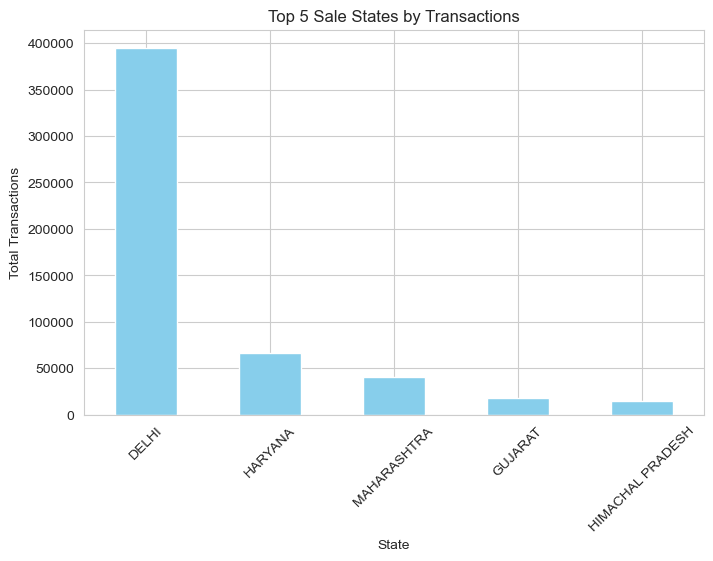

In [144]:
top_sale_states = df_grouped.sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
top_sale_states.plot(kind="bar", color="skyblue")
plt.title("Top 5 Sale States by Transactions")
plt.xlabel("State")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.show()

# Top 5 states with the highest transactions (sale state)

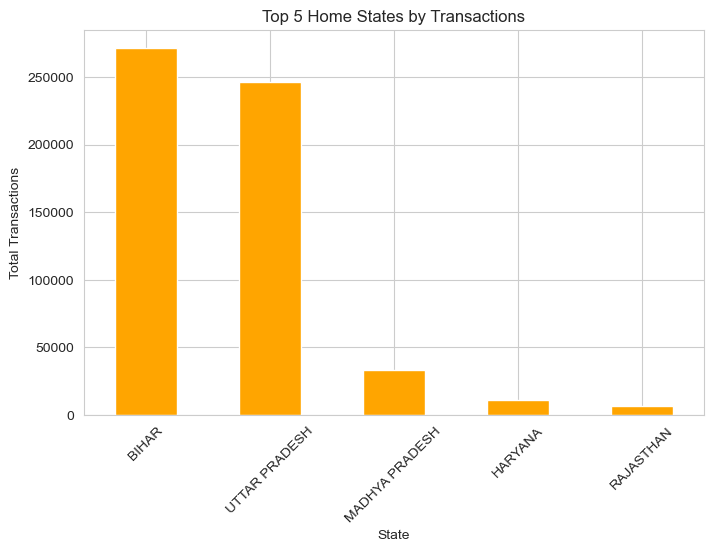

In [147]:
top_home_states = df_grouped_home.sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
top_home_states.plot(kind="bar", color="orange")
plt.title("Top 5 Home States by Transactions")
plt.xlabel("State")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.show()

# Top 5 states with the highest transactions (home state

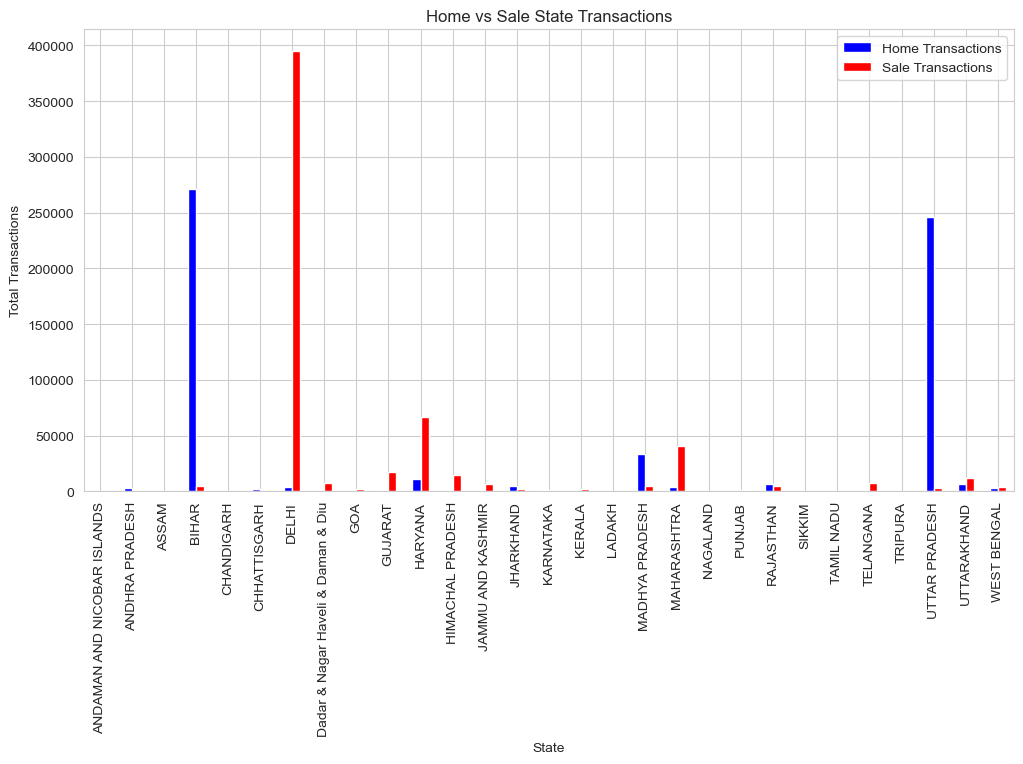

In [152]:
df_comparison = pd.DataFrame({
    "Home Transactions": df_grouped_home,
    "Sale Transactions": df_grouped
}).fillna(0)

df_comparison.plot(kind="bar", figsize=(12, 6), color=["blue", "red"])
plt.title("Home vs Sale State Transactions")
plt.xlabel("State")
plt.ylabel("Total Transactions")
plt.xticks(rotation=90)
plt.legend(["Home Transactions", "Sale Transactions"])
plt.show()

# Side-by-side comparison of home vs. sale state transactions

Enter the state name for detailed analysis:  Andhra Pradesh


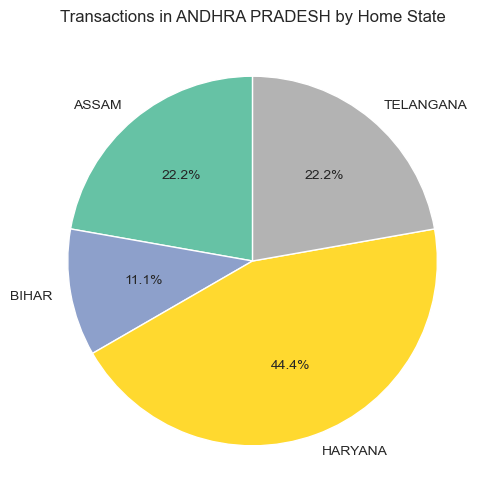

In [155]:
state_name = input("Enter the state name for detailed analysis: ").upper()
if state_name in df["salestatename"].values:
    state_data = df[df["salestatename"] == state_name].groupby("homestatename")["txn_count"].sum()
    
    plt.figure(figsize=(10, 6))
    state_data.plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set2")
    plt.title(f"Transactions in {state_name} by Home State")
    plt.ylabel("")
    plt.show()
else:
    print("State not found in the dataset.")

# Pie chart for transactions of a AP

Enter the state name for detailed analysis:  Rajasthan


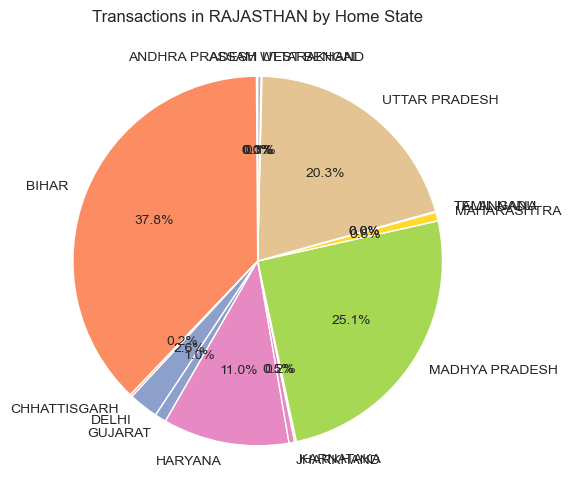

In [161]:
state_name = input("Enter the state name for detailed analysis: ").upper()
if state_name in df["salestatename"].values:
    state_data = df[df["salestatename"] == state_name].groupby("homestatename")["txn_count"].sum()
    
    plt.figure(figsize=(10, 6))
    state_data.plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set2")
    plt.title(f"Transactions in {state_name} by Home State")
    plt.ylabel("")
    plt.show()
else:
    print("State not found in the dataset.")

# Pie chart for transactions of a Rajasthan

Enter the state name for detailed analysis:  Bihar


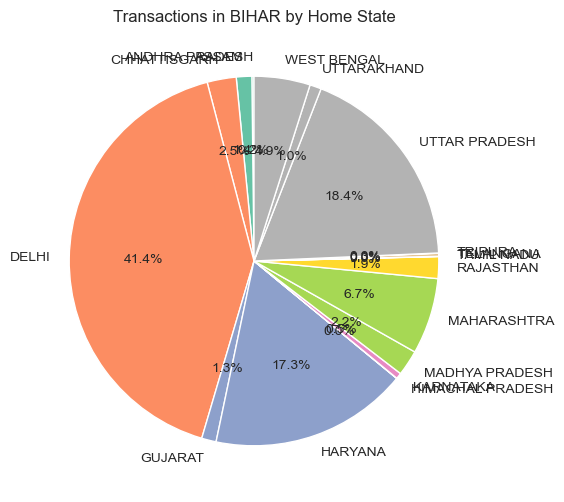

In [165]:
state_name = input("Enter the state name for detailed analysis: ").upper()
if state_name in df["salestatename"].values:
    state_data = df[df["salestatename"] == state_name].groupby("homestatename")["txn_count"].sum()
    
    plt.figure(figsize=(10, 6))
    state_data.plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set2")
    plt.title(f"Transactions in {state_name} by Home State")
    plt.ylabel("")
    plt.show()
else:
    print("State not found in the dataset.")

# Pie chart for transactions of a Bihar

Enter the state name for detailed analysis:  Uttar Pradesh


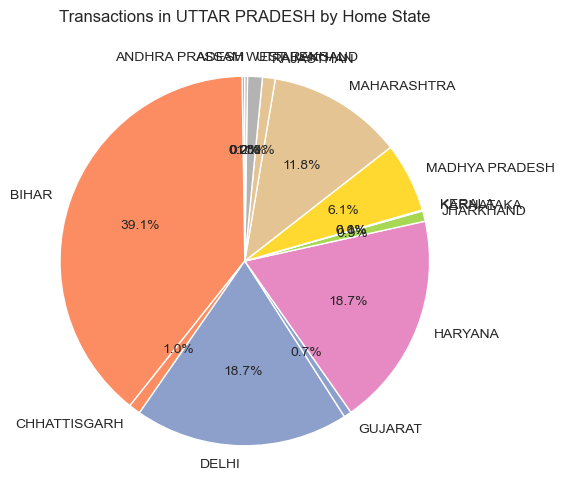

In [169]:
state_name = input("Enter the state name for detailed analysis: ").upper()
if state_name in df["salestatename"].values:
    state_data = df[df["salestatename"] == state_name].groupby("homestatename")["txn_count"].sum()
    
    plt.figure(figsize=(10, 6))
    state_data.plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set2")
    plt.title(f"Transactions in {state_name} by Home State")
    plt.ylabel("")
    plt.show()
else:
    print("State not found in the dataset.")


# Pie chart for transactions of a Uttar Pradesh

Enter the state name for detailed analysis:  Delhi


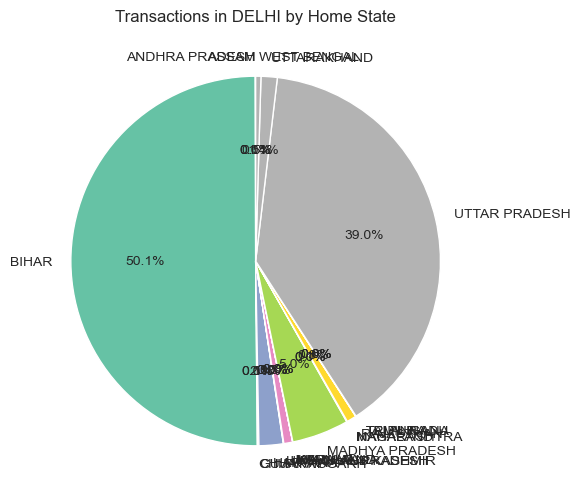

In [171]:
state_name = input("Enter the state name for detailed analysis: ").upper()
if state_name in df["salestatename"].values:
    state_data = df[df["salestatename"] == state_name].groupby("homestatename")["txn_count"].sum()
    
    plt.figure(figsize=(10, 6))
    state_data.plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set2")
    plt.title(f"Transactions in {state_name} by Home State")
    plt.ylabel("")
    plt.show()
else:
    print("State not found in the dataset.")

# Pie chart for transactions of a Delhi

Enter the state name for detailed analysis:  Gujarat


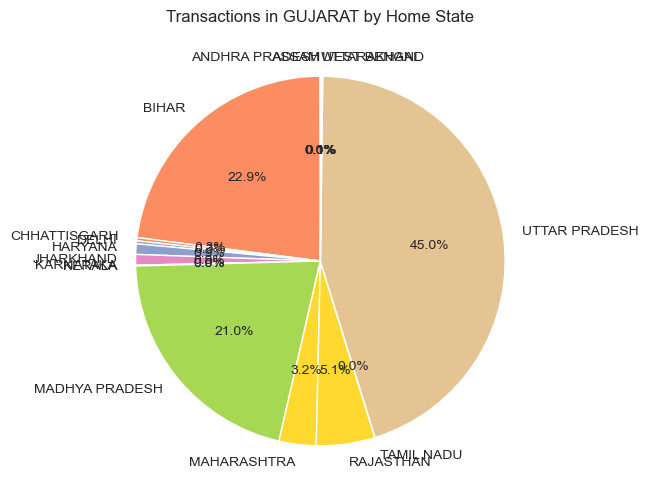

In [173]:
state_name = input("Enter the state name for detailed analysis: ").upper()
if state_name in df["salestatename"].values:
    state_data = df[df["salestatename"] == state_name].groupby("homestatename")["txn_count"].sum()
    
    plt.figure(figsize=(10, 6))
    state_data.plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set2")
    plt.title(f"Transactions in {state_name} by Home State")
    plt.ylabel("")
    plt.show()
else:
    print("State not found in the dataset.")

# Pie chart for transactions of a Gujarat

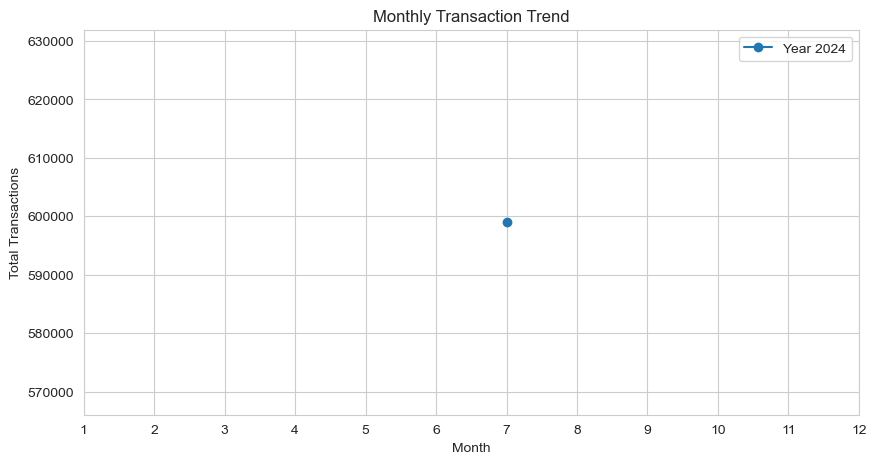

In [181]:
if "month" in df.columns and "year" in df.columns:
    df_monthly = df.groupby(["year", "month"])["txn_count"].sum().reset_index()
    
    plt.figure(figsize=(10, 5))
    for year in df_monthly["year"].unique():
        subset = df_monthly[df_monthly["year"] == year]
        plt.plot(subset["month"], subset["txn_count"], marker="o", linestyle="-", label=f"Year {year}")

    plt.title("Monthly Transaction Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Transactions")
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid(True)
    plt.show()

# Monthly trend analysis

Enter a state name to analyze transactions:  Bihar


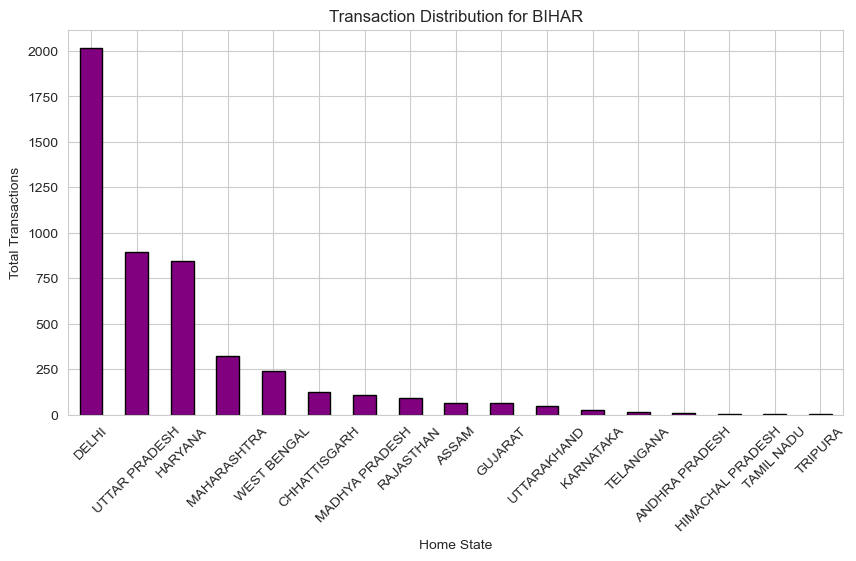

In [184]:
state_name = input("Enter a state name to analyze transactions: ").upper()
if state_name in df["salestatename"].values:
    state_data = df[df["salestatename"] == state_name].groupby("homestatename")["txn_count"].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 5))
    state_data.plot(kind="bar", color="purple", edgecolor="black")
    plt.title(f"Transaction Distribution for {state_name}")
    plt.xlabel("Home State")
    plt.ylabel("Total Transactions")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("State not found in the dataset.")

# Bihar State Analysis

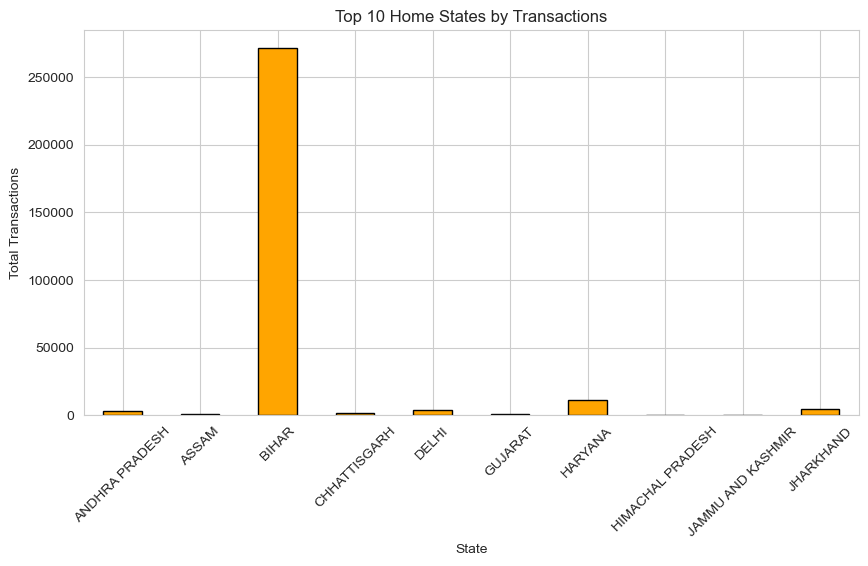

In [189]:
plt.figure(figsize=(10, 5))
df_grouped_home.head(10).plot(kind="bar", color="orange", edgecolor="black")
plt.title("Top 10 Home States by Transactions")
plt.xlabel("State")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.show()

# Top 10 home states by transactions

C:\Users\kotar\AppData\Local\Temp\ipykernel_26736\945238288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_grouped_sale.head(10).index, y=df_grouped_sale.head(10).values, palette="Blues_r")


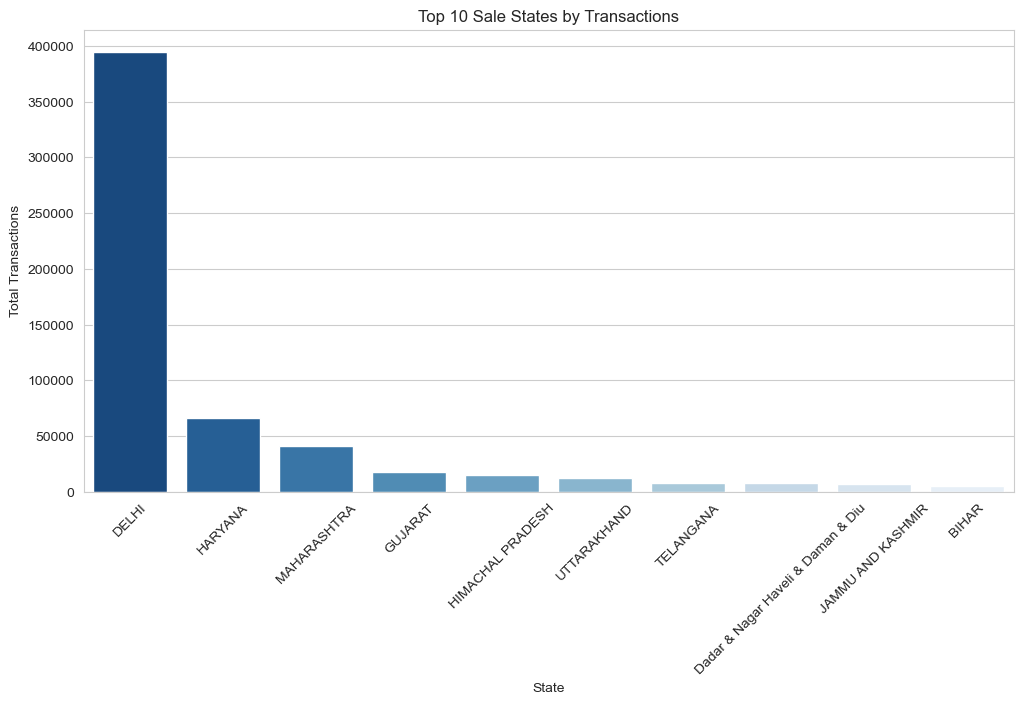

In [200]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_grouped_sale.head(10).index, y=df_grouped_sale.head(10).values, palette="Blues_r")
plt.title("Top 10 Sale States by Transactions")
plt.xlabel("State")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.show()

# Top 10 sale states by transactions using Seaborn

In [1]:

    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=state_data.index, y=state_data.values, palette="Purples_r")
    plt.title(f"Transaction Distribution for {state_name}")
    plt.xlabel("Home State")
    plt.ylabel("Total Transactions")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("State not found in the dataset.")

SyntaxError: invalid syntax (2084543733.py, line 8)

# User-defined state analysis with Seaborn